# data frame 

- from list
- from dict

In [10]:
import pandas as pd

data = [['철수', 50, 90, 30],
        ['영희', 20, 40, 50],
        ['민수', 90, 90, 90]]

header = ['이름', '국어', '영어', '수학']

df = pd.DataFrame(data, columns=header)
df

,이름,국어,영어,수학
0,철수,50,90,30
1,영희,20,40,50
2,민수,90,90,90


In [11]:
data_dict = {'이름': ['철수', '영희', '민수'], 
             '국어': [50, 20, 90],
             '영어': [90, 40, 90],
             '수학': [30, 50, 90]}

df2 = pd.DataFrame(data_dict)
df2

,이름,국어,영어,수학
0,철수,50,90,30
1,영희,20,40,50
2,민수,90,90,90


# indexing

- loc
- iloc

In [12]:
df.iloc[0]

이름    철수
국어    50
영어    90
수학    30
Name: 0, dtype: object

In [13]:
df.loc[0]

이름    철수
국어    50
영어    90
수학    30
Name: 0, dtype: object

# define index

In [14]:
df = df.set_index('이름')
df

,국어,영어,수학
이름,,,
철수,50,90,30
영희,20,40,50
민수,90,90,90


In [15]:
df.loc['철수']

국어    50
영어    90
수학    30
Name: 철수, dtype: int64

In [16]:
df.iloc[0]

국어    50
영어    90
수학    30
Name: 철수, dtype: int64

In [21]:
df.국어

이름
철수    50
영희    20
민수    90
Name: 국어, dtype: int64

In [22]:
df.loc['철수', '국어']

50

In [23]:
df.loc['철수', :]

국어    50
영어    90
수학    30
Name: 철수, dtype: int64

In [24]:
df.loc['철수', ['국어', '영어']]

국어    50
영어    90
Name: 철수, dtype: int64

In [30]:
df.loc[['철수', '민수'], '국어']

이름
철수    50
민수    90
Name: 국어, dtype: int64

In [52]:
df[df.국어 == 50]

,국어,영어,수학
이름,,,
철수,50,90,30


# time series data

In [20]:
time_series_data = [['2020.01.01', 100],
                   ['2020.01.02', 150],
                   ['2020.01.03', 200],
                   ['2020.01.04', 250]]

header = ['date', 'value']

df3 = pd.DataFrame(time_series_data, columns=header)
df3

,date,value
0,2020.01.01,100
1,2020.01.02,150
2,2020.01.03,200
3,2020.01.04,250


In [25]:
pd.to_datetime(df3['date'], format='%Y.%m.%d', errors='raise')

0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-04
Name: date, dtype: datetime64[ns]

In [26]:
df3.date = pd.to_datetime(df3['date'], format='%Y.%m.%d', errors='raise')
df3

,date,value
0,2020-01-01,100
1,2020-01-02,150
2,2020-01-03,200
3,2020-01-04,250


In [28]:
df3 = df3.set_index('date')
df3

,value
date,
2020-01-01,100
2020-01-02,150
2020-01-03,200
2020-01-04,250


/Users/jonghyunlee/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


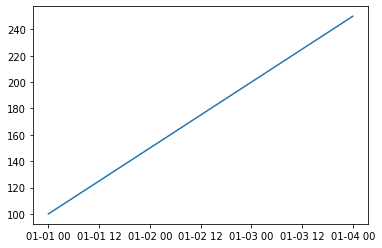

In [29]:
import matplzotlib.pyplot as plt

plt.figure()
plt.plot(df3.value)

# merge, groupby

In [42]:
a = {"학년": [1,1,1,1,2,2,2,2,3,3,3,3],
    "반": [1,1,2,2,1,1,2,2,1,1,2,2],
    "국어점수": [40,30,50,60,20,40,70,80,90,100,90,80]}

df4 = pd.DataFrame(a)
df4

,학년,반,국어점수
0,1,1,40
1,1,1,30
2,1,2,50
3,1,2,60
4,2,1,20
5,2,1,40
6,2,2,70
7,2,2,80
8,3,1,90
9,3,1,100


In [43]:
b = {"학년": [1,1,2,2,2,2,3,3,3,3],
    "반": [1,1,1,1,2,2,1,1,2,2],
    "수학점수": [10,20,50,40,30,20,70,80,60,90]}

df5 = pd.DataFrame(b)
df5

,학년,반,수학점수
0,1,1,10
1,1,1,20
2,2,1,50
3,2,1,40
4,2,2,30
5,2,2,20
6,3,1,70
7,3,1,80
8,3,2,60
9,3,2,90


In [44]:
pd.merge(df4, df5, on=['학년', '반'])

,학년,반,국어점수,수학점수
0,1,1,40,10
1,1,1,40,20
2,1,1,30,10
3,1,1,30,20
4,2,1,20,50
5,2,1,20,40
6,2,1,40,50
7,2,1,40,40
8,2,2,70,30
9,2,2,70,20


In [46]:
pd.merge(df4, df5, how='left', on=['학년', '반'])

,학년,반,국어점수,수학점수
0,1,1,40,10.0
1,1,1,40,20.0
2,1,1,30,10.0
3,1,1,30,20.0
4,1,2,50,NaN
5,1,2,60,NaN
6,2,1,20,50.0
7,2,1,20,40.0
8,2,1,40,50.0
9,2,1,40,40.0


In [47]:
pd.merge(df4, df5, how='right', on=['학년', '반'])

,학년,반,국어점수,수학점수
0,1,1,40,10
1,1,1,30,10
2,1,1,40,20
3,1,1,30,20
4,2,1,20,50
5,2,1,40,50
6,2,1,20,40
7,2,1,40,40
8,2,2,70,30
9,2,2,80,30


In [49]:
pd.concat([df4, df5], axis=0)

/Users/jonghyunlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,국어점수,반,수학점수,학년
0,40.0,1,NaN,1
1,30.0,1,NaN,1
2,50.0,2,NaN,1
3,60.0,2,NaN,1
4,20.0,1,NaN,2
5,40.0,1,NaN,2
6,70.0,2,NaN,2
7,80.0,2,NaN,2
8,90.0,1,NaN,3
9,100.0,1,NaN,3


In [50]:
pd.concat([df4, df5], axis=1)

,학년,반,국어점수,학년,반,수학점수
0,1,1,40,1.0,1.0,10.0
1,1,1,30,1.0,1.0,20.0
2,1,2,50,2.0,1.0,50.0
3,1,2,60,2.0,1.0,40.0
4,2,1,20,2.0,2.0,30.0
5,2,1,40,2.0,2.0,20.0
6,2,2,70,3.0,1.0,70.0
7,2,2,80,3.0,1.0,80.0
8,3,1,90,3.0,2.0,60.0
9,3,1,100,3.0,2.0,90.0


# pandas & numpy

In [54]:
df4.values

array([[  1,   1,  40],
       [  1,   1,  30],
       [  1,   2,  50],
       [  1,   2,  60],
       [  2,   1,  20],
       [  2,   1,  40],
       [  2,   2,  70],
       [  2,   2,  80],
       [  3,   1,  90],
       [  3,   1, 100],
       [  3,   2,  90],
       [  3,   2,  80]])

In [55]:
df4.values.tolist()

[[1, 1, 40],
 [1, 1, 30],
 [1, 2, 50],
 [1, 2, 60],
 [2, 1, 20],
 [2, 1, 40],
 [2, 2, 70],
 [2, 2, 80],
 [3, 1, 90],
 [3, 1, 100],
 [3, 2, 90],
 [3, 2, 80]]